The purpose of this project is to analyze heart rate mortality data for different counties across the US for the year 2014. According to our hypothesis, the data varies according to:

1. Gender (Male or Female)
2. Ethnicity (White, Hispanic, Black, Asian)
3. State (Wealthier counties within a state may have lower mortality due to better lifestyle ans healthier eating choices)

In [1]:
import pandas as pd
import numpy as np



In [2]:
import os
os.path.isfile('/Users/Diwan/Heart_Disease_Mortality.csv')

True

In [3]:
os.getcwd()


'C:\\Users\\Diwan'

In [4]:
os.chdir('C:\\Users\\Diwan')

In [5]:
# taking a first look at our raw data
HDM = pd.read_csv("Heart_Disease_Mortality.csv")
HDM.head()

,State,GeographicLevel,DataSource,Class,Topic,HDM,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Gender,Race/Ethnicity,Ethnicity
0,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall
1,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall
2,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall
3,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall
4,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall


In [ ]:

# Replace the missing values using the average values from that column. The column HDM represents Number of deaths per 100,000 population


HDM = HDM.fillna(HDM.mean())
HDM.head()


In [ ]:
HDM.isnull().sum()


In [ ]:
# Analyzing data by grouping by Gender
HDM['Data_Value'].groupby([HDM['Stratification1']]).mean()


We can see that Males have a higher mortality rate than females

In [ ]:
# Analyzing data by grouping by Ethnicity
HDM['Data_Value'].groupby([HDM['Stratification2']]).mean()


In [ ]:
HDM_Ethnicity = HDM.pivot_table(values = 'Data_Value', index = 'Stratification2', aggfunc=np.mean, margins=True)
HDM_Ethnicity.plot(kind='barh', title='Mean HDM by Ethnicity', legend=False)

HDM_mean = HDM_Ethnicity['Data_Value'].mean()

We can see that Blacks have the highest mortality rate at 396.9, followed by White and American Indian and Alaskan Natives.Hispanics have the lowest. 

In [ ]:
# Grouping the mortality data by the respective county
HDM['Data_Value'].groupby([HDM['LocationDesc']]).mean()
HDM_sorted = HDM.sort_values("Data_Value", ascending = False)

HDM_sorted.head()



In [ ]:
HDM['Data_Value'].groupby([HDM['Stratification1']]).describe()


In [ ]:
# plotting heart rate mortality data by each county
import matplotlib.pyplot as plt
%matplotlib inline
by_county = HDM.groupby('LocationDesc').mean()
by_county['Data_Value'].plot.line()
plt.xticks(rotation=45)
plt.show()

Analyzing data for both genders to determine which counties have the highest and lowest death rates.

In [41]:
Males = HDM[HDM['Stratification1'] == 'Male']
Males_sorted = Males.sort_values("Data_Value", ascending = False)
Males_sorted.head()


,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
28360,Sioux County,1716.1,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
25033,Lauderdale County,1700.0,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
24999,Attala County,1544.6,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
28320,Adams County,1537.5,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
39298,Campbell County,1503.2,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native


In [57]:
Males_sorted = Males.sort_values("Data_Value")
Males_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
53683,Pitt County,23.0,Gender,Male,Race/Ethnicity,Hispanic
53199,Knox County,27.4,Gender,Male,Race/Ethnicity,Asian and Pacific Islander
59035,Woodbury County,45.2,Gender,Male,Race/Ethnicity,Hispanic
21505,Carver County,49.6,Gender,Male,Race/Ethnicity,Hispanic
34309,Love County,50.1,Gender,Male,Race/Ethnicity,Hispanic


In [42]:
Females = HDM[HDM['Stratification1'] == 'Female']
Females_sorted = Females.sort_values("Data_Value", ascending = False)
Females_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
15516,Cowley County,1592.8,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native
25127,Neshoba County,1246.6,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native
11851,Morgan County,986.8,Gender,Female,Race/Ethnicity,Black
17839,Franklin Parish,922.0,Gender,Female,Race/Ethnicity,White
17647,Franklin Parish,889.9,Gender,Female,Race/Ethnicity,Overall


In [58]:
Females_sorted = Females.sort_values("Data_Value",)
Females_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
55580,Sebastian County,6.0,Gender,Female,Race/Ethnicity,Hispanic
56004,Fayette County,13.2,Gender,Female,Race/Ethnicity,Asian and Pacific Islander
56092,Spotsylvania County,15.4,Gender,Female,Race/Ethnicity,Hispanic
27176,Orange County,17.0,Gender,Female,Race/Ethnicity,Hispanic
58386,Alamance County,17.2,Gender,Female,Race/Ethnicity,Hispanic


Doing some research on counties provided some interesting facts. We can see that Orange County has one of the lowest mortality rate and median household income in 2007 was $ 61,899. Even though it is one of the most populated counties of California, indiciating that there may be a correlation between household income and mortality rate.

For Cowley county and Neshoba County, with one of the highest mortality rates, the median household income was found to be below $40,000, with around 20% of the population loving below the poverty line. 

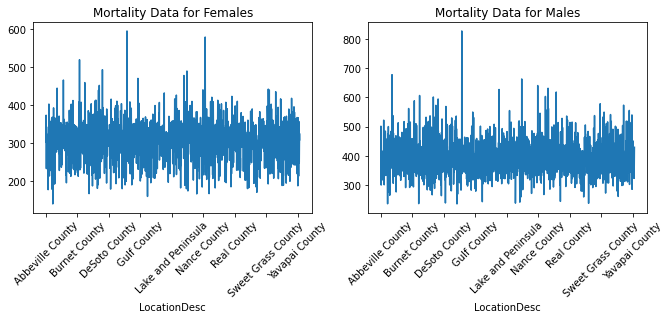

In [56]:
plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
by_county = Females.groupby('LocationDesc').mean()
by_county['Data_Value'].plot.line()
plt.xticks(rotation=45)
plt.title('Mortality Data for Females')


plt.subplot(1, 2, 2)
by_county = Males.groupby('LocationDesc').mean()
by_county['Data_Value'].plot.line()
plt.xticks(rotation=45)

plt.title('Mortality Data for Males')

plt.show()

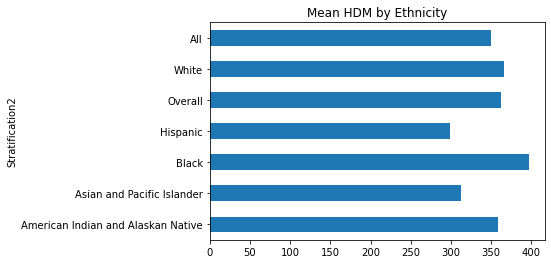